In [ ]:
!pip install numpy pandas scikit-learn tensorflow keras matplotlib seaborn


In [ ]:
!pip install torch

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21

**Step 1: Import Necessary Libraries**


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset


**Step 2: Load and Preprocess Data**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


In [ ]:
class ModelKNN():
    def __init__(self):
        self.distances = []
        self.final_label = []

    def euclidean_distance(self, test_vector, train_feature_vectors, train_labels):
        for i in range(len(train_feature_vectors)):
            train_vector = train_feature_vectors[i]
            distance = np.sqrt(np.sum((test_vector - train_vector)**2))
            self.distances.append([distance, train_labels[i]]) #distance
        self.distances = sorted(self.distances, key=lambda x: (x[0],))

    def get_k_nearest_neighbours(self, k):
        labels = []
        for i in range(k):
            labels.append(self.distances[i][1])  # get only classes
        return labels

    def get_nearest_neighbor(self, k, train_labels):
        labels = self.get_k_nearest_neighbours(k)
        freq = [0] * 2  # holds [number of class 0, number of class 1] in the nearest k neighbours

        weights = [1 / (d[0] + 1e-6) for d in self.distances[:k]]

        for i in range(len(labels)):
            if labels[i] == 0:
                freq[0] += weights[i]
            else:
                freq[1] += weights[i]

        if freq[0] == freq[1]:
            return train_labels[0]
        return max(set(labels), key=labels.count)

    def classifier(self, k, train_features, test_features, train_labels):
        for test in test_features:
            self.distances = []
            self.euclidean_distance(test, train_features, train_labels)
            self.final_label.append(self.get_nearest_neighbor(k, train_labels))
        return self.final_label

    def MinMaxNormlization(self, feature):
        # Min-Max Scaling
        min_val = np.min(feature)
        max_val = np.max(feature)
        scaled = (feature - min_val) / (max_val - min_val)#(x-min)/(max-min)
        return scaled

    def loadD(self, data):
        X = np.delete(data,8,axis=1)#all data but not the last column
        Y = [] #the last column
        for i in range(len(data)):
            Y.append(data[i][8])
        #shuffling data important to ensure training and testing sets are representative of data.
        train_data, test_data, train_labels, test_labels = train_test_split(X, Y, test_size=0.3, shuffle=True)

        for i in range(8):#terates over the range from 0 to 7 the(number of features)
            train_data[:, [i]] = self.MinMaxNormlization(train_data[:, [i]])
            test_data[:, [i]] = self.MinMaxNormlization(test_data[:, [i]])

        return train_data, test_data, train_labels, test_labels

In [ ]:
if __name__ == "__main__":

    data = pd.read_csv('diabetes.csv')

    Model = ModelKNN()
    train_data, test_data, train_labels, test_labels = Model.loadD(data.values)

    k_values = [3, 4, 5, 6]

    # Perform multiple iterations of k on the dataset
    num_iterations = 5  # Number of iterations for each k value
    for k in k_values:
        KNN_Predictions=ModelKNN.classifier(Model,k,train_data, test_data, train_labels)

        wrong_classifier =0
        for i in range(len(test_labels)):
            if KNN_Predictions[i] != test_labels[i]:
                wrong_classifier+=1

        print("K = ",k)
        print("Number of correctly classified instances :",len(test_labels) - wrong_classifier)
        print("Total number of instances : ",len(test_labels))
        accuracy = (1-(wrong_classifier/len(test_labels)))*100
        print("Accuracy: ", accuracy , "%")

K =  3
Number of correctly classified instances : 167
Total number of instances :  231
Accuracy:  72.2943722943723 %
K =  4
Number of correctly classified instances : 167
Total number of instances :  231
Accuracy:  72.2943722943723 %
K =  5
Number of correctly classified instances : 167
Total number of instances :  231
Accuracy:  72.2943722943723 %
K =  6
Number of correctly classified instances : 167
Total number of instances :  231
Accuracy:  72.2943722943723 %


In [ ]:
file_path = '/content/diabetes.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(data.head())

# Check for missing values
print(data.isnull().sum())

# Preprocess the data
# Split into features and target
X = data.drop(columns=['Outcome'])  # Assuming 'Outcome' is the target variable
y = data['Outcome']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


Experiment 1 - Decision Tree Size: 167, Accuracy: 0.683982683982684, Information Gain: 0.9201467852522096
Experiment 2 - Decision Tree Size: 187, Accuracy: 0.7402597402597403, Information Gain: 0.9341511828968383
Experiment 3 - Decision Tree Size: 173, Accuracy: 0.7445887445887446, Information Gain: 0.9273266882662003
Experiment 4 - Decision Tree Size: 183, Accuracy: 0.7186147186147186, Information Gain: 0.9358021984078704
Experiment 5 - Decision Tree Size: 177, Accuracy: 0.6926406926406926, Information Gain: 0.9390384773948453

Best Performing Model - Decision Tree Size: 173, Accuracy: 0.7445887445887446, Information Gain: 0.9273266882662003


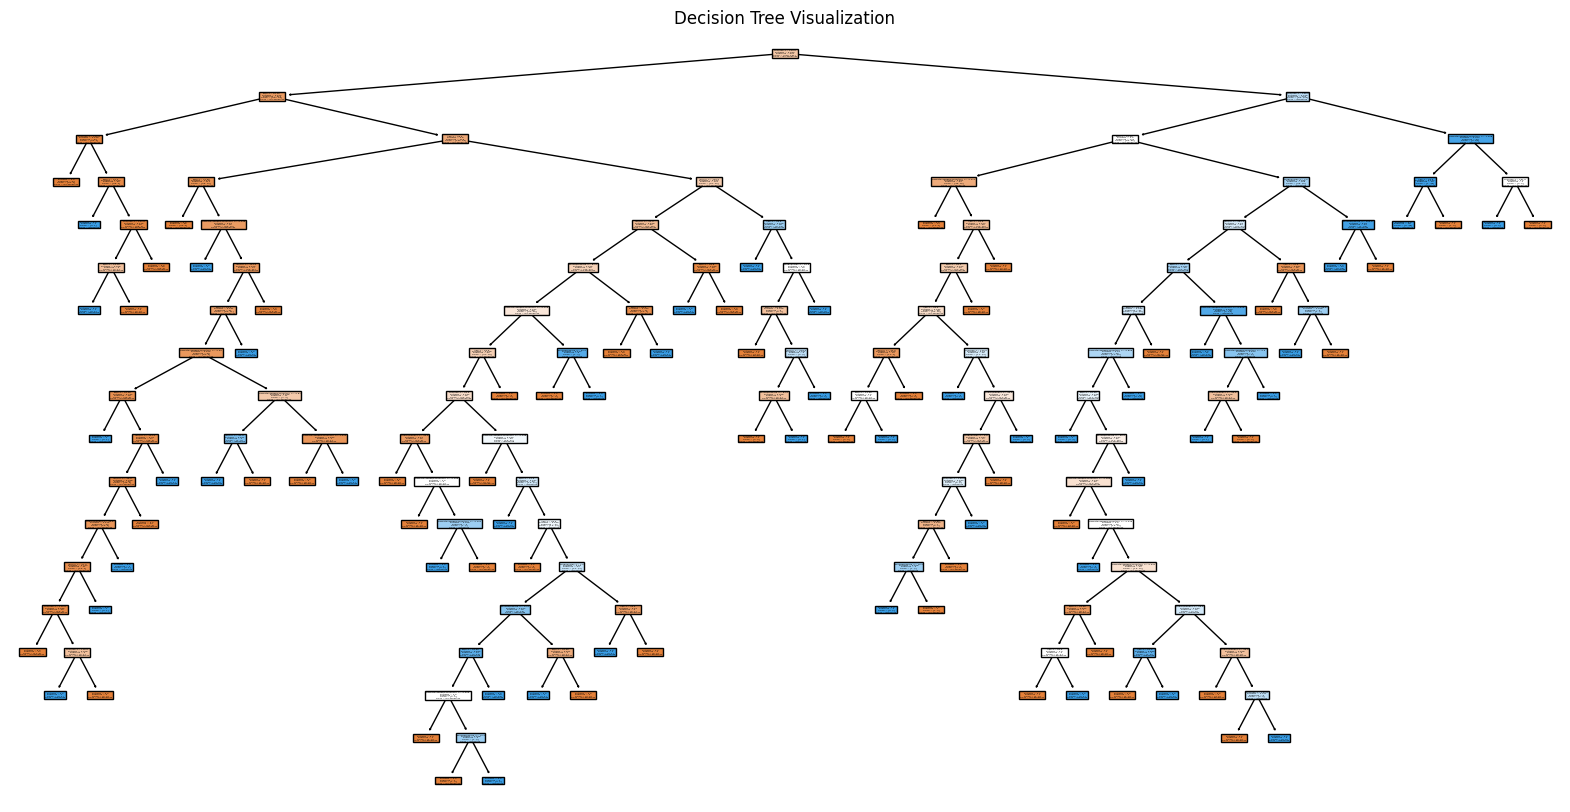

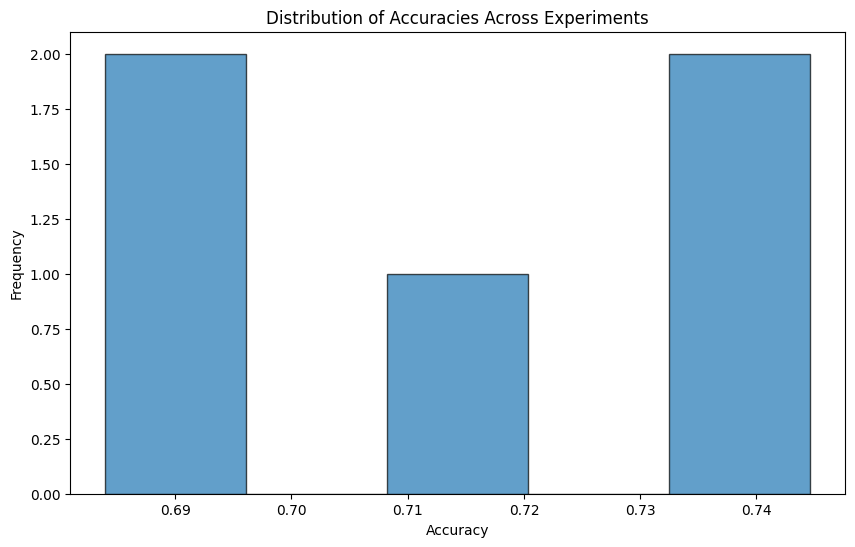

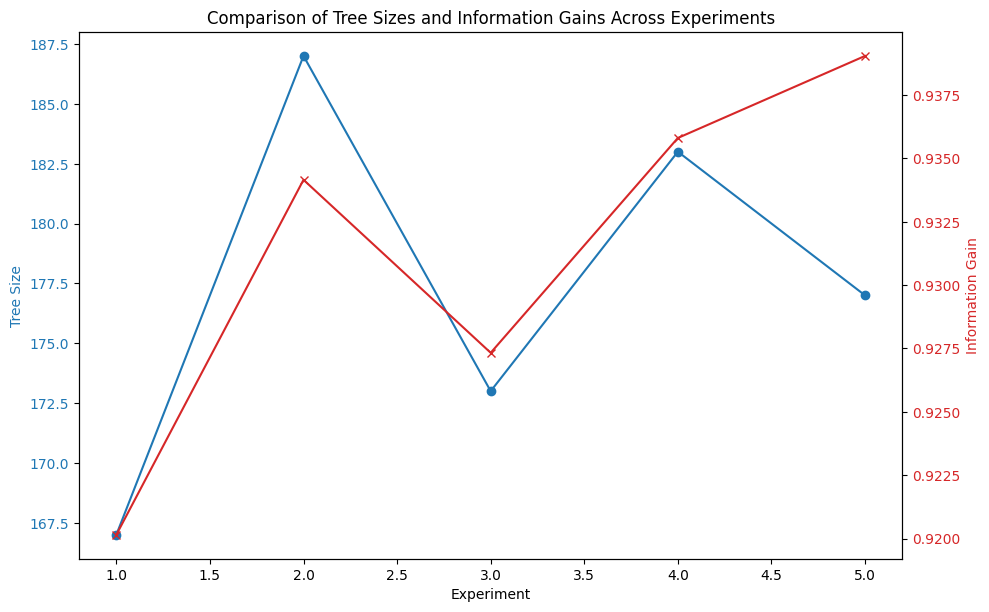

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load the dataset
url = "diabetes.csv"  # Replace with the actual path
df = pd.read_csv(url)

# Data Preprocessing
X = df.drop(columns=['Outcome'])  # Assuming 'Outcome' is the target variable
y = df['Outcome']

# Initialize variables to store results
accuracies = []
tree_sizes = []
information_gains = []

# Experiment loop
for _ in range(5):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=None)

    # Create a decision tree classifier with "entropy" criterion
    dt_classifier = DecisionTreeClassifier(criterion='entropy')

    # Train the model
    dt_classifier.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = dt_classifier.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

    # Record the size of the decision tree
    tree_sizes.append(dt_classifier.tree_.node_count)

    # Calculate Information Gain (related to entropy)
    information_gain = np.sum(dt_classifier.tree_.compute_feature_importances(normalize=False))
    information_gains.append(information_gain)

# Display results
for i in range(5):
    print(f"Experiment {i+1} - Decision Tree Size: {tree_sizes[i]}, Accuracy: {accuracies[i]}, Information Gain: {information_gains[i]}")

# Compare the results and select the model with the highest overall performance
best_experiment = accuracies.index(max(accuracies))
print(f"\nBest Performing Model - Decision Tree Size: {tree_sizes[best_experiment]}, Accuracy: {accuracies[best_experiment]}, Information Gain: {information_gains[best_experiment]}")

# Visualization: Decision Tree of the best model
plt.figure(figsize=(20, 10))
plot_tree(dt_classifier, filled=True, feature_names=X.columns, class_names=['No Diabetes', 'Diabetes'])
plt.title('Decision Tree Visualization')
plt.show()

# Visualization: Distribution of Accuracies
plt.figure(figsize=(10, 6))
plt.hist(accuracies, bins=5, edgecolor='k', alpha=0.7)
plt.title('Distribution of Accuracies Across Experiments')
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.show()

# Visualization: Comparison of Tree Sizes and Information Gains
experiments = range(1, 6)
fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:blue'
ax1.set_xlabel('Experiment')
ax1.set_ylabel('Tree Size', color=color)
ax1.plot(experiments, tree_sizes, color=color, marker='o', label='Tree Size')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Information Gain', color=color)
ax2.plot(experiments, information_gains, color=color, marker='x', label='Information Gain')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('Comparison of Tree Sizes and Information Gains Across Experiments')
plt.show()


Experiment Report with Information Gain:
   Split Ratio  Mean Accuracy (Info Gain)  Max Accuracy (Info Gain)  \
0          0.3                   0.682900                  0.719331   
1          0.4                   0.690672                  0.722343   
2          0.5                   0.703125                  0.729167   
3          0.6                   0.691558                  0.711039   
4          0.7                   0.696970                  0.718615   

   Min Accuracy (Info Gain)  Mean Tree Size (Info Gain)  \
0                  0.644981                        80.2   
1                  0.663774                       109.4   
2                  0.666667                       131.4   
3                  0.662338                       151.4   
4                  0.666667                       179.0   

   Max Tree Size (Info Gain)  Min Tree Size (Info Gain)  
0                         85                         71  
1                        115                        101  
2  

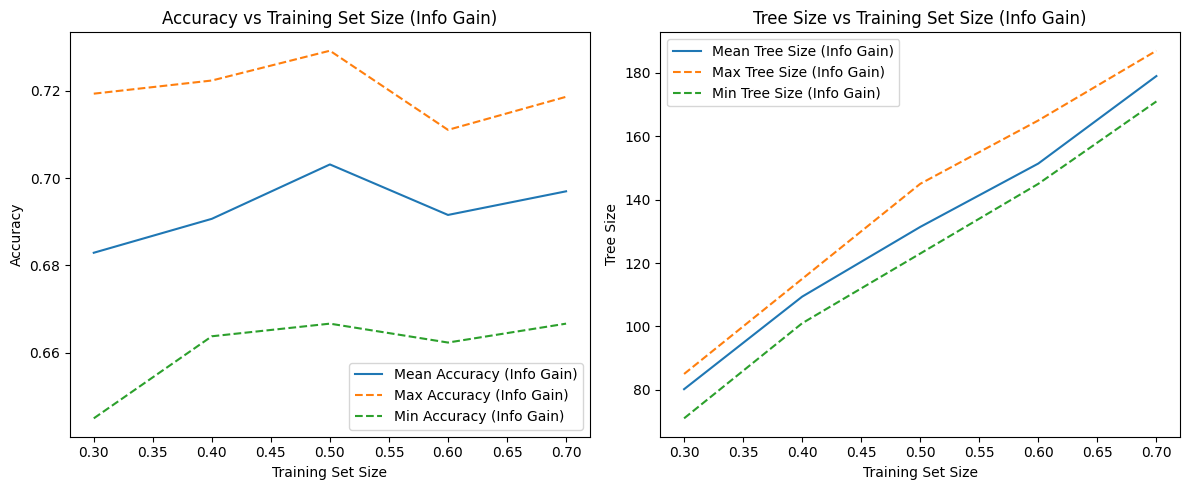

In [ ]:
url = "diabetes.csv"  # Replace with the actual path
df = pd.read_csv(url)
X = data.drop(columns=['Outcome'])  # Assuming 'Outcome' is the target variable
y = data['Outcome']
split_ratios = np.arange(0.3, 0.8, 0.1)
mean_accuracies_info_gain = []
max_accuracies_info_gain = []
min_accuracies_info_gain = []
mean_tree_sizes_info_gain = []
max_tree_sizes_info_gain = []
min_tree_sizes_info_gain = []

# Experiment loop
for split_ratio in split_ratios:
    accuracies_info_gain = []
    tree_sizes_info_gain = []

    # Run the experiment with five different random seeds
    for seed in range(5):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1 - split_ratio, random_state=seed)

        dt_classifier_info_gain = DecisionTreeClassifier(criterion='entropy')
        dt_classifier_info_gain.fit(X_train, y_train)

        y_pred_info_gain = dt_classifier_info_gain.predict(X_test)

        accuracy_info_gain = accuracy_score(y_test, y_pred_info_gain)
        accuracies_info_gain.append(accuracy_info_gain)

        tree_sizes_info_gain.append(dt_classifier_info_gain.tree_.node_count)

    # Calculate statistics
    mean_accuracies_info_gain.append(np.mean(accuracies_info_gain))
    max_accuracies_info_gain.append(np.max(accuracies_info_gain))
    min_accuracies_info_gain.append(np.min(accuracies_info_gain))
    mean_tree_sizes_info_gain.append(np.mean(tree_sizes_info_gain))
    max_tree_sizes_info_gain.append(np.max(tree_sizes_info_gain))
    min_tree_sizes_info_gain.append(np.min(tree_sizes_info_gain))

# Display statistics
report_df_info_gain = pd.DataFrame({
    'Split Ratio': split_ratios,
    'Mean Accuracy (Info Gain)': mean_accuracies_info_gain,
    'Max Accuracy (Info Gain)': max_accuracies_info_gain,
    'Min Accuracy (Info Gain)': min_accuracies_info_gain,
    'Mean Tree Size (Info Gain)': mean_tree_sizes_info_gain,
    'Max Tree Size (Info Gain)': max_tree_sizes_info_gain,
    'Min Tree Size (Info Gain)': min_tree_sizes_info_gain
})

print("Experiment Report with Information Gain:")
print(report_df_info_gain)

# Create plots
plt.figure(figsize=(12, 5))

# Accuracy vs Training Set Size
plt.subplot(1, 2, 1)
plt.plot(split_ratios, mean_accuracies_info_gain, label='Mean Accuracy (Info Gain)')
plt.plot(split_ratios, max_accuracies_info_gain, label='Max Accuracy (Info Gain)', linestyle='--')
plt.plot(split_ratios, min_accuracies_info_gain, label='Min Accuracy (Info Gain)', linestyle='--')
plt.title('Accuracy vs Training Set Size (Info Gain)')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend()

# Tree Size vs Training Set Size
plt.subplot(1, 2, 2)
plt.plot(split_ratios, mean_tree_sizes_info_gain, label='Mean Tree Size (Info Gain)')
plt.plot(split_ratios, max_tree_sizes_info_gain, label='Max Tree Size (Info Gain)', linestyle='--')
plt.plot(split_ratios, min_tree_sizes_info_gain, label='Min Tree Size (Info Gain)', linestyle='--')
plt.title('Tree Size vs Training Set Size (Info Gain)')
plt.xlabel('Training Set Size')
plt.ylabel('Tree Size')
plt.legend()

plt.tight_layout()
plt.show()

***Added Visualisations***


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


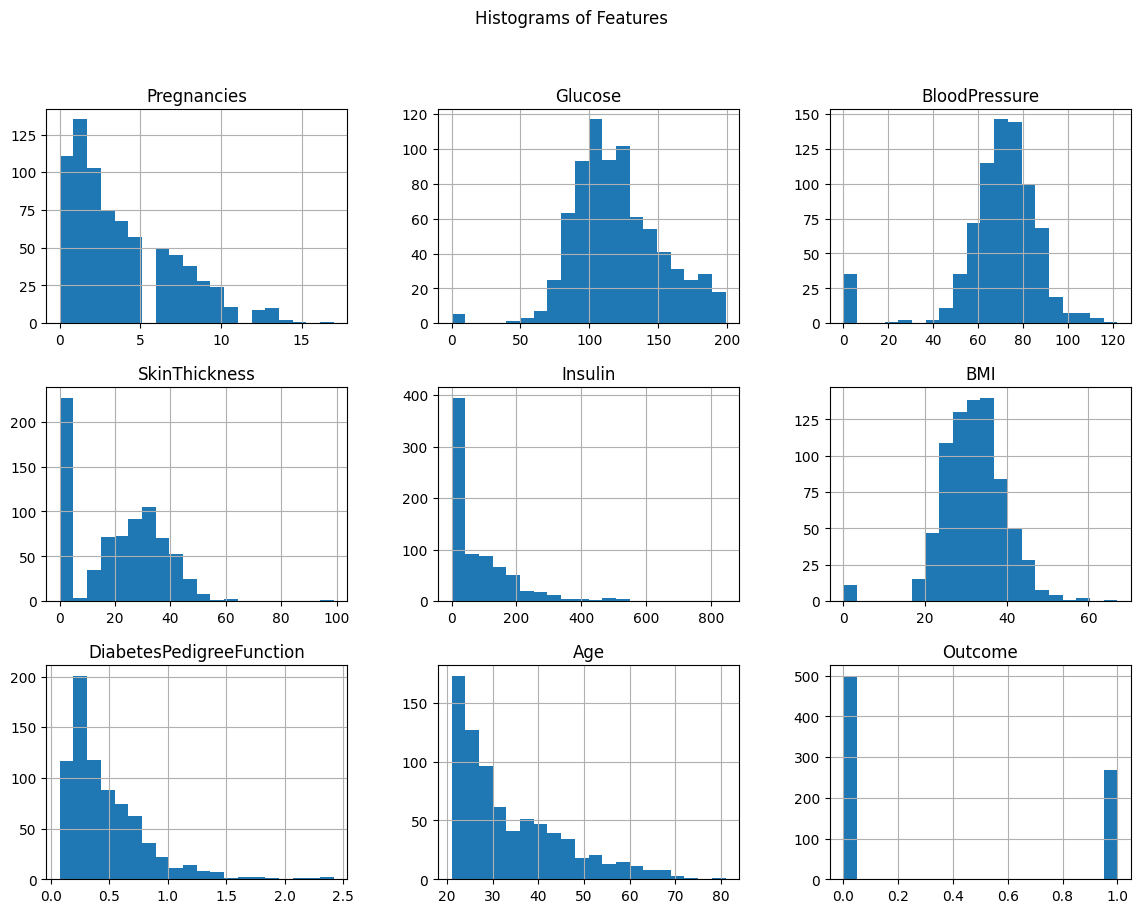

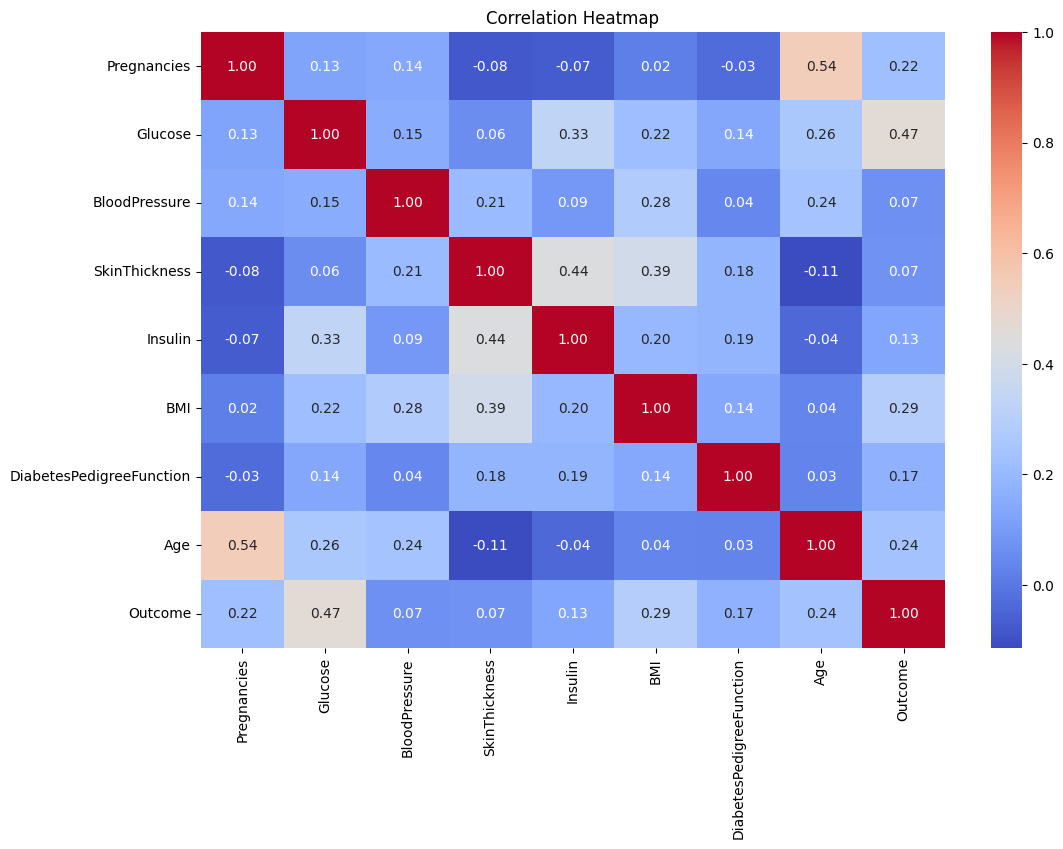

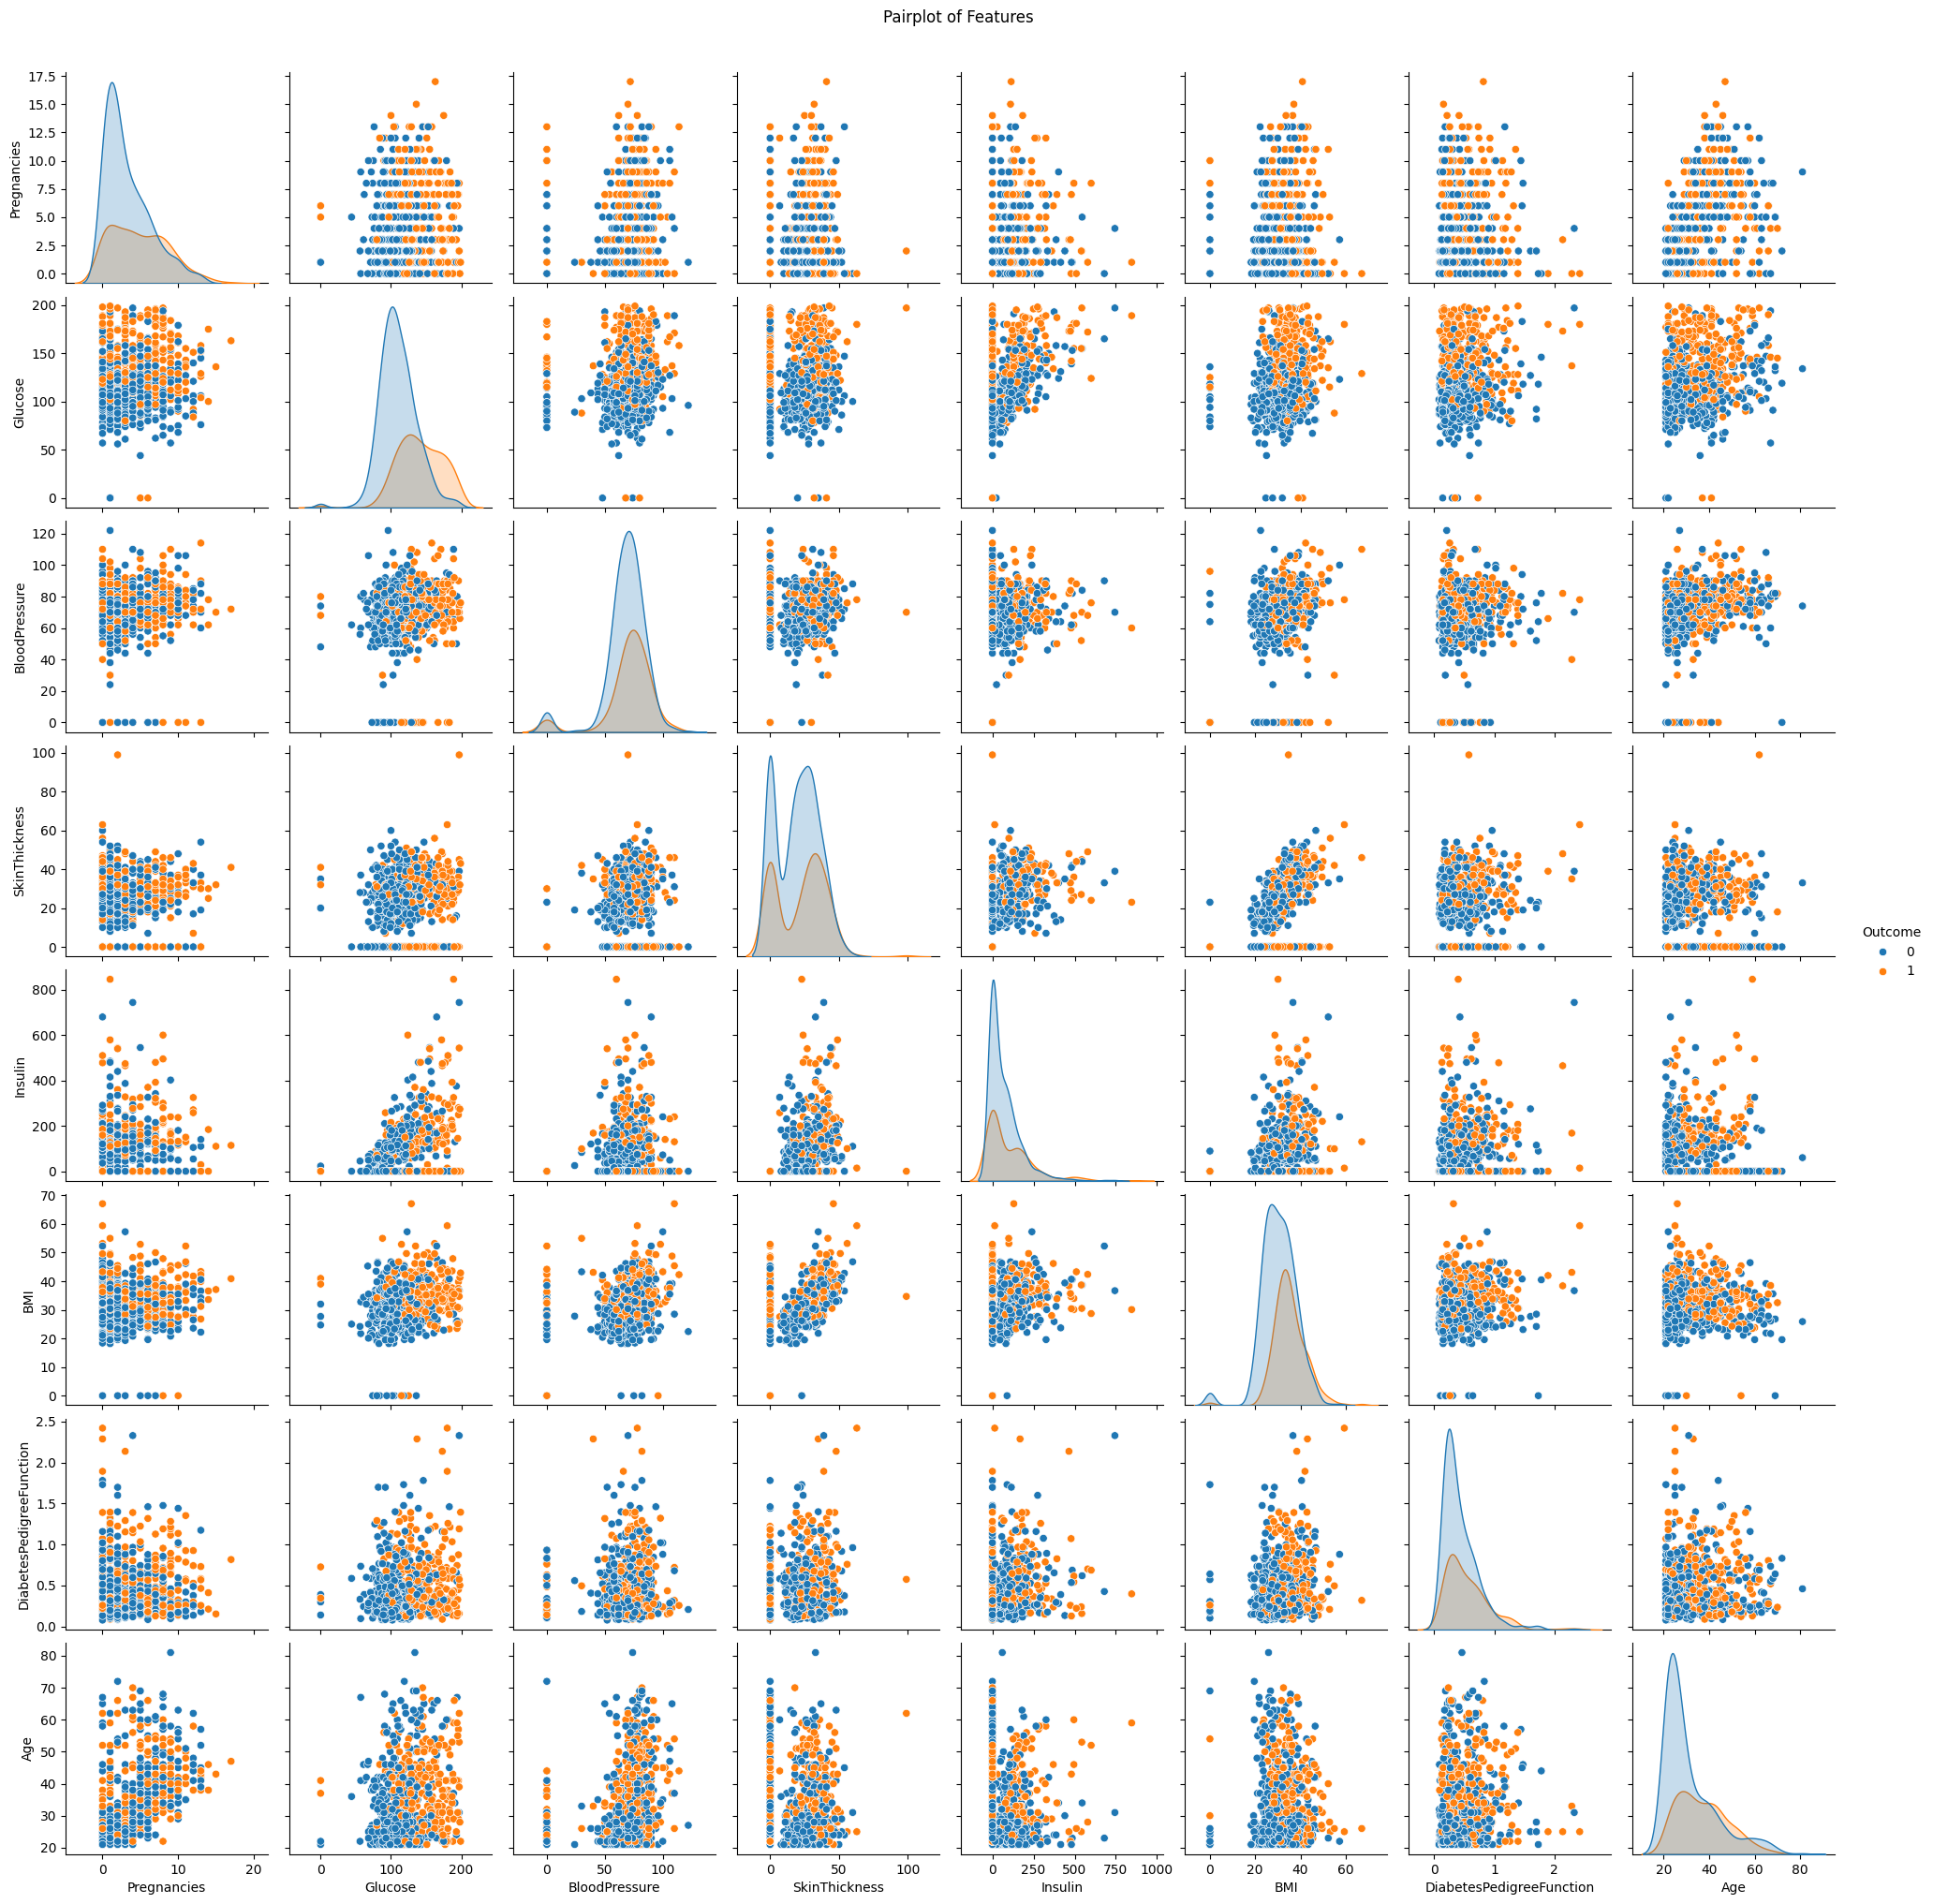

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load the dataset
file_path = '/content/diabetes.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(data.head())

# Check for missing values
print(data.isnull().sum())

# Preprocess the data
# Split into features and target
X = data.drop(columns=['Outcome'])  # Assuming 'Outcome' is the target variable
y = data['Outcome']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Visualization
# 1. Histograms of each feature
data.hist(bins=20, figsize=(14, 10))
plt.suptitle('Histograms of Features')
plt.show()

# 2. Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# 3. Pairplot
sns.pairplot(data, hue='Outcome', diag_kind='kde')
plt.suptitle('Pairplot of Features', y=1.02)
plt.show()


**Step 3: Define and Train a Deep Generative Model (Variational Autoencoder - VAE)**

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import pandas as pd

# Assuming CUDA is available, otherwise fallback to CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Example data (replace with your actual data loading)
# Ensure that X_train, y_train, X_test, y_test are properly loaded and aligned
X_train = pd.DataFrame({'feature1': [1, 2, 3], 'feature2': [4, 5, 6]}, index=[0, 1, 2])
y_train = pd.Series([0, 1, 0], index=[0, 1, 2])
X_test = pd.DataFrame({'feature1': [4, 5, 6], 'feature2': [7, 8, 9]}, index=[3, 4, 5])
y_test = pd.Series([1, 0, 1], index=[3, 4, 5])

# Custom Dataset class
class DiabetesDataset(Dataset):
    def __init__(self, features, labels):
        self.features = features
        self.labels = labels

    def __len__(self):
        return len(self.features)

    def __getitem__(self, idx):
        return torch.Tensor(self.features.iloc[idx].values), torch.Tensor([self.labels.iloc[idx]])

# Create DataLoader for training and test sets
train_dataset = DiabetesDataset(X_train, y_train)
test_dataset = DiabetesDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Define the VAE model
class VAE(nn.Module):
    def __init__(self, input_dim, hidden_dim, latent_dim):
        super(VAE, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, latent_dim * 2)  # Latent mean and log variance
        )
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, input_dim),
            nn.Sigmoid()
        )

    def encode(self, x):
        h = self.encoder(x)
        mean, logvar = h[:, :latent_dim], h[:, latent_dim:]
        return mean, logvar

    def reparameterize(self, mean, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mean + eps * std

    def decode(self, z):
        return self.decoder(z)

    def forward(self, x):
        mean, logvar = self.encode(x)
        z = self.reparameterize(mean, logvar)
        return self.decode(z), mean, logvar

# Model hyperparameters
input_dim = X_train.shape[1]
hidden_dim = 64
latent_dim = 2

# Instantiate the model, define the optimizer and loss function
model = VAE(input_dim, hidden_dim, latent_dim).to(device)
optimizer = optim.Adam(model.parameters(), lr=1e-3)
bce_loss_function = nn.BCELoss(reduction='sum')  # Rename to avoid conflict

# Training the VAE
def loss_function(recon_x, x, mean, logvar):
    BCE = bce_loss_function(recon_x, x)
    KLD = -0.5 * torch.sum(1 + logvar - mean.pow(2) - logvar.exp())
    return BCE + KLD

num_epochs = 50
for epoch in range(num_epochs):
    model.train()
    train_loss = 0
    for batch_idx, (data, target) in enumerate(train_loader):
        data = data.to(device)  # Move data to device (GPU/CPU)
        data = data.clamp(0, 1)  # Ensure data is between 0 and 1
        optimizer.zero_grad()
        recon_batch, mean, logvar = model(data)
        loss = loss_function(recon_batch, data, mean, logvar)
        loss.backward()
        train_loss += loss.item()
        optimizer.step()
    print(f'Epoch {epoch + 1}, Loss: {train_loss / len(train_loader.dataset)}')



Epoch 1, Loss: 2.0342723528544107
Epoch 2, Loss: 1.9704593022664387
Epoch 3, Loss: 1.8108197848002117
Epoch 4, Loss: 1.8514196077982585
Epoch 5, Loss: 1.6741749445597331
Epoch 6, Loss: 1.66280730565389
Epoch 7, Loss: 1.3835290273030598
Epoch 8, Loss: 1.6102081934611003
Epoch 9, Loss: 1.3296047846476238
Epoch 10, Loss: 1.5090861320495605
Epoch 11, Loss: 1.3920361200968425
Epoch 12, Loss: 1.312886635462443
Epoch 13, Loss: 1.30927570660909
Epoch 14, Loss: 1.3775231043497722
Epoch 15, Loss: 1.30110764503479
Epoch 16, Loss: 1.3015907605489094
Epoch 17, Loss: 1.299070914586385
Epoch 18, Loss: 1.1602377891540527
Epoch 19, Loss: 1.2002247174580891
Epoch 20, Loss: 1.4781662623087566
Epoch 21, Loss: 1.2064231236775715
Epoch 22, Loss: 1.313102165857951
Epoch 23, Loss: 1.380489667256673
Epoch 24, Loss: 1.1751670042673747
Epoch 25, Loss: 1.3503812154134114
Epoch 26, Loss: 1.3178444703420003
Epoch 27, Loss: 1.3160504500071208
Epoch 28, Loss: 1.088929812113444
Epoch 29, Loss: 0.9819879531860352
Epoch

***Added Visualisations***

Epoch 1, Loss: 1.3385953903198242
Epoch 2, Loss: 1.3347926139831543
Epoch 3, Loss: 1.1923268636067708
Epoch 4, Loss: 1.263267199198405
Epoch 5, Loss: 1.1874111493428547
Epoch 6, Loss: 1.2008998394012451
Epoch 7, Loss: 1.2982086340586345
Epoch 8, Loss: 1.0941229661305745
Epoch 9, Loss: 1.0485715866088867
Epoch 10, Loss: 0.9803297519683838
Epoch 11, Loss: 1.127606709798177
Epoch 12, Loss: 1.1139230728149414
Epoch 13, Loss: 1.210474967956543
Epoch 14, Loss: 0.9329050381978353
Epoch 15, Loss: 1.076095422108968
Epoch 16, Loss: 0.8673530419667562
Epoch 17, Loss: 0.882775624593099
Epoch 18, Loss: 1.0166963736216228
Epoch 19, Loss: 0.9057393868764242
Epoch 20, Loss: 0.8867002328236898
Epoch 21, Loss: 1.1073691844940186
Epoch 22, Loss: 0.8093585968017578
Epoch 23, Loss: 0.8500111897786459
Epoch 24, Loss: 0.9579290548960367
Epoch 25, Loss: 0.6527836322784424
Epoch 26, Loss: 1.0605154832204182
Epoch 27, Loss: 0.9125463167826334
Epoch 28, Loss: 0.7698879241943359
Epoch 29, Loss: 1.0044949054718018

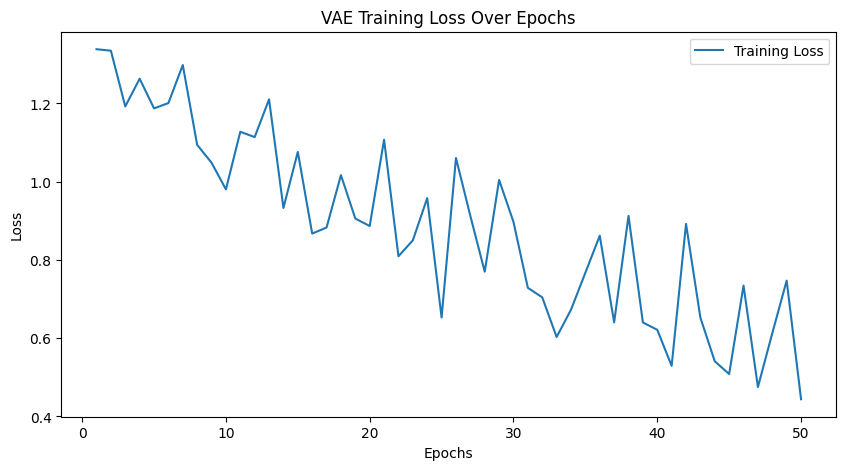

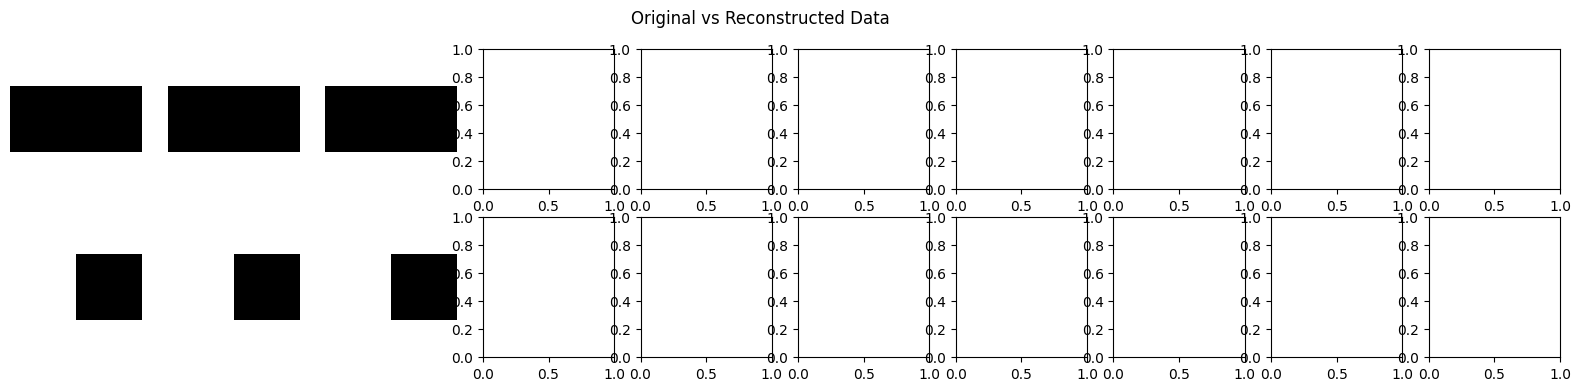

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import matplotlib.pyplot as plt

# Assuming CUDA is available, otherwise fallback to CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Example data (replace with your actual data loading)
# Ensure that X_train, y_train, X_test, y_test are properly loaded and aligned
X_train = pd.DataFrame({'feature1': [1, 2, 3], 'feature2': [4, 5, 6]}, index=[0, 1, 2])
y_train = pd.Series([0, 1, 0], index=[0, 1, 2])
X_test = pd.DataFrame({'feature1': [4, 5, 6], 'feature2': [7, 8, 9]}, index=[3, 4, 5])
y_test = pd.Series([1, 0, 1], index=[3, 4, 5])

# Custom Dataset class
class DiabetesDataset(Dataset):
    def __init__(self, features, labels):
        self.features = features
        self.labels = labels

    def __len__(self):
        return len(self.features)

    def __getitem__(self, idx):
        return torch.Tensor(self.features.iloc[idx].values), torch.Tensor([self.labels.iloc[idx]])

# Create DataLoader for training and test sets
train_dataset = DiabetesDataset(X_train, y_train)
test_dataset = DiabetesDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Define the VAE model
class VAE(nn.Module):
    def __init__(self, input_dim, hidden_dim, latent_dim):
        super(VAE, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, latent_dim * 2)  # Latent mean and log variance
        )
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, input_dim),
            nn.Sigmoid()
        )

    def encode(self, x):
        h = self.encoder(x)
        mean, logvar = h[:, :latent_dim], h[:, latent_dim:]
        return mean, logvar

    def reparameterize(self, mean, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mean + eps * std

    def decode(self, z):
        return self.decoder(z)

    def forward(self, x):
        mean, logvar = self.encode(x)
        z = self.reparameterize(mean, logvar)
        return self.decode(z), mean, logvar

# Model hyperparameters
input_dim = X_train.shape[1]
hidden_dim = 64
latent_dim = 2

# Instantiate the model, define the optimizer and loss function
model = VAE(input_dim, hidden_dim, latent_dim).to(device)
optimizer = optim.Adam(model.parameters(), lr=1e-3)
bce_loss_function = nn.BCELoss(reduction='sum')  # Rename to avoid conflict

# Training the VAE
def loss_function(recon_x, x, mean, logvar):
    BCE = bce_loss_function(recon_x, x)
    KLD = -0.5 * torch.sum(1 + logvar - mean.pow(2) - logvar.exp())
    return BCE + KLD

num_epochs = 50
train_losses = []

for epoch in range(num_epochs):
    model.train()
    train_loss = 0
    for batch_idx, (data, target) in enumerate(train_loader):
        data = data.to(device)  # Move data to device (GPU/CPU)
        data = data.clamp(0, 1)  # Ensure data is between 0 and 1
        optimizer.zero_grad()
        recon_batch, mean, logvar = model(data)
        loss = loss_function(recon_batch, data, mean, logvar)
        loss.backward()
        train_loss += loss.item()
        optimizer.step()
    train_losses.append(train_loss / len(train_loader.dataset))
    print(f'Epoch {epoch + 1}, Loss: {train_loss / len(train_loader.dataset)}')

# Visualize training loss
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('VAE Training Loss Over Epochs')
plt.legend()
plt.show()

# Visualize reconstructed vs original data
def visualize_reconstruction(model, data_loader, num_images=10):
    model.eval()
    with torch.no_grad():
        for i, (data, target) in enumerate(data_loader):
            data = data.to(device).clamp(0, 1)
            recon_data, mean, logvar = model(data)
            data = data.cpu().numpy()
            recon_data = recon_data.cpu().numpy()

            fig, axes = plt.subplots(2, num_images, figsize=(num_images * 2, 4))
            for j in range(num_images):
                if j < data.shape[0]:
                    axes[0, j].imshow(data[j].reshape(1, -1), cmap='gray')
                    axes[0, j].axis('off')
                    axes[1, j].imshow(recon_data[j].reshape(1, -1), cmap='gray')
                    axes[1, j].axis('off')
            plt.suptitle('Original vs Reconstructed Data')
            plt.show()
            break  # Only show one batch

visualize_reconstruction(model, test_loader)


**Step 4: Generate Synthetic Data and Personalized Recommendations**

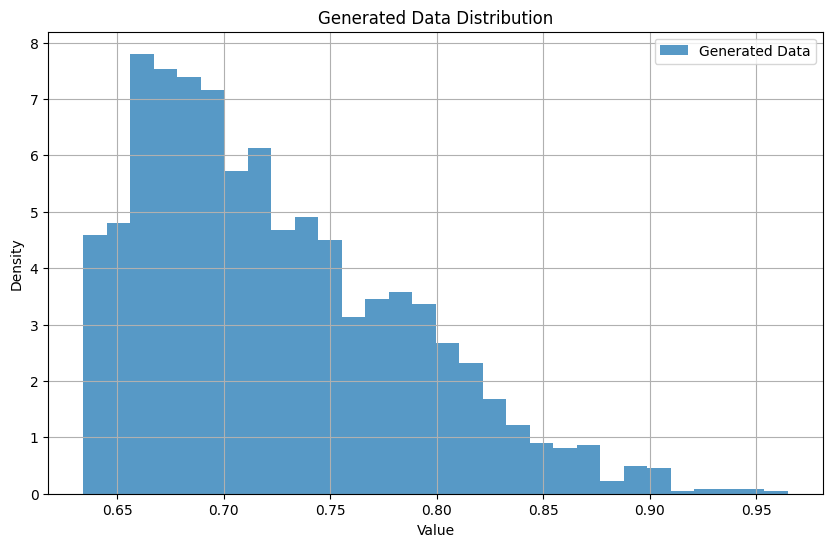

In [ ]:
import numpy as np

model.eval()
with torch.no_grad():
    z = torch.randn(1000, latent_dim).to(device)
    generated_data = model.decode(z).cpu().numpy()

# Plot the generated data distribution
plt.figure(figsize=(10, 6))
plt.title("Generated Data Distribution")
plt.hist(generated_data.flatten(), bins=30, density=True, alpha=0.75, label='Generated Data')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()


**Added Visualisations**

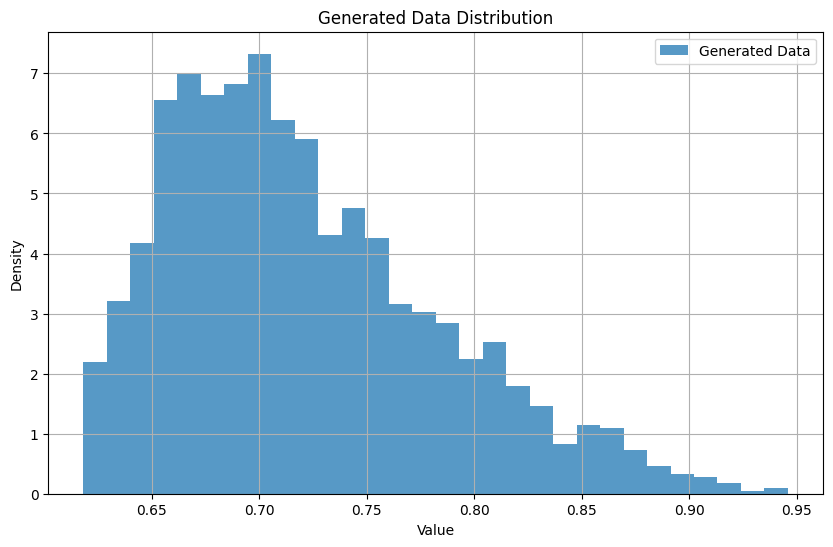

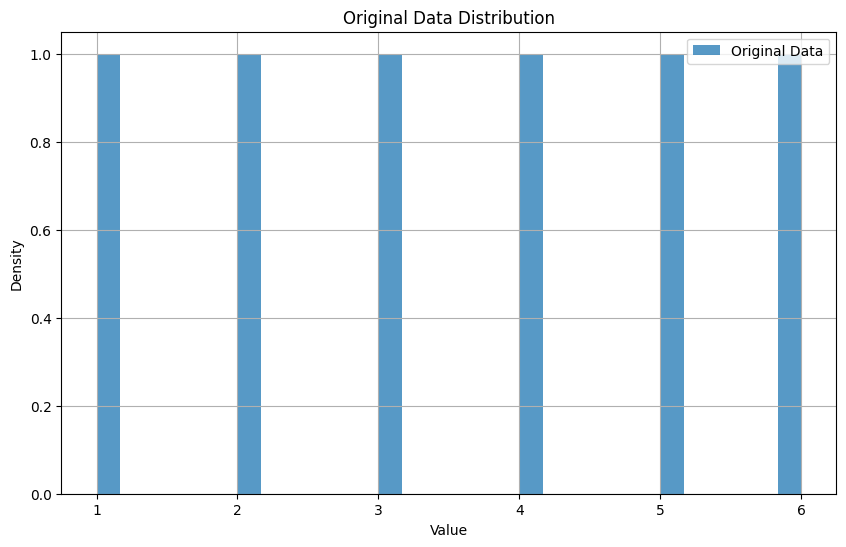

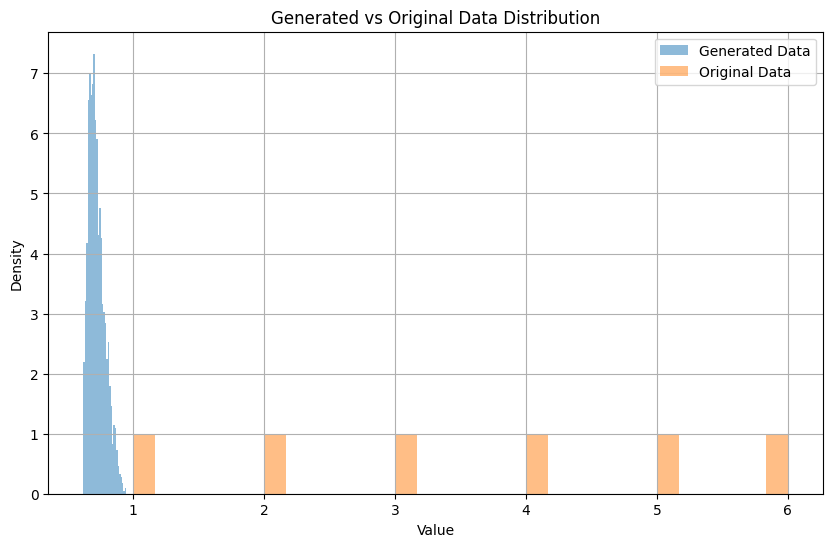

In [ ]:
import numpy as np

# Generate data using the trained VAE model
model.eval()
with torch.no_grad():
    z = torch.randn(1000, latent_dim).to(device)
    generated_data = model.decode(z).cpu().numpy()

# Plot the generated data distribution
plt.figure(figsize=(10, 6))
plt.title("Generated Data Distribution")
plt.hist(generated_data.flatten(), bins=30, density=True, alpha=0.75, label='Generated Data')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

# Plot the original data distribution for comparison
original_data = X_train.values.flatten()
plt.figure(figsize=(10, 6))
plt.title("Original Data Distribution")
plt.hist(original_data, bins=30, density=True, alpha=0.75, label='Original Data')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

# Plot both distributions together for comparison
plt.figure(figsize=(10, 6))
plt.title("Generated vs Original Data Distribution")
plt.hist(generated_data.flatten(), bins=30, density=True, alpha=0.5, label='Generated Data')
plt.hist(original_data, bins=30, density=True, alpha=0.5, label='Original Data')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()


**Step 5: Validate the Model**

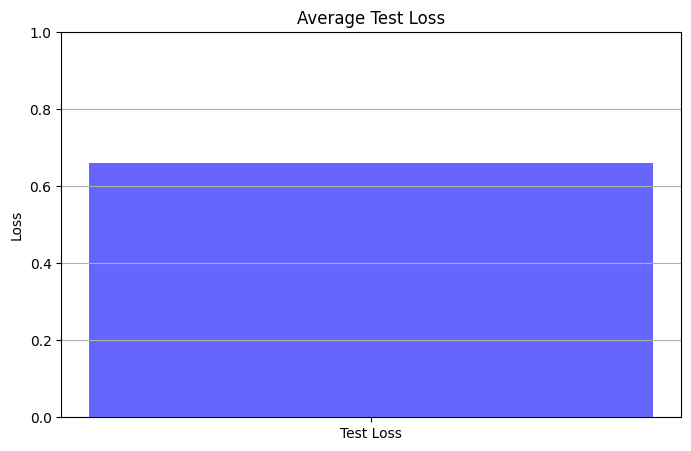

In [ ]:
model.eval()
test_loss = 0
with torch.no_grad():
    for data, _ in test_loader:
        data = data.to(device)
        data = data.clamp(0, 1)  # Ensure data is between 0 and 1
        recon_batch, mean, logvar = model(data)
        loss = loss_function(recon_batch, data, mean, logvar)
        test_loss += loss.item()

# Calculate average test loss
avg_test_loss = test_loss / len(test_loader.dataset)

# Display test loss
plt.figure(figsize=(8, 5))
plt.bar(['Test Loss'], [avg_test_loss], color='blue', alpha=0.6)
plt.title('Average Test Loss')
plt.ylabel('Loss')
plt.ylim(0, 1)
plt.grid(axis='y')
plt.show()


***Added Visualisations***

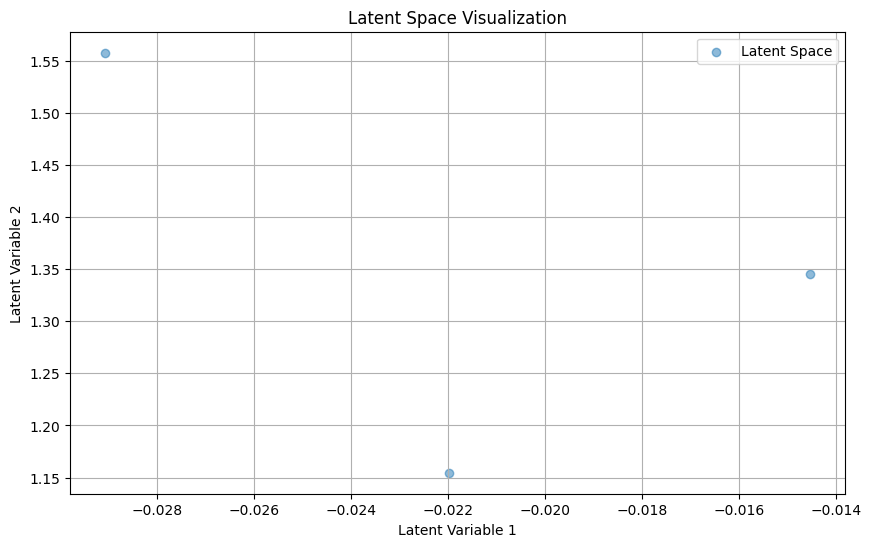

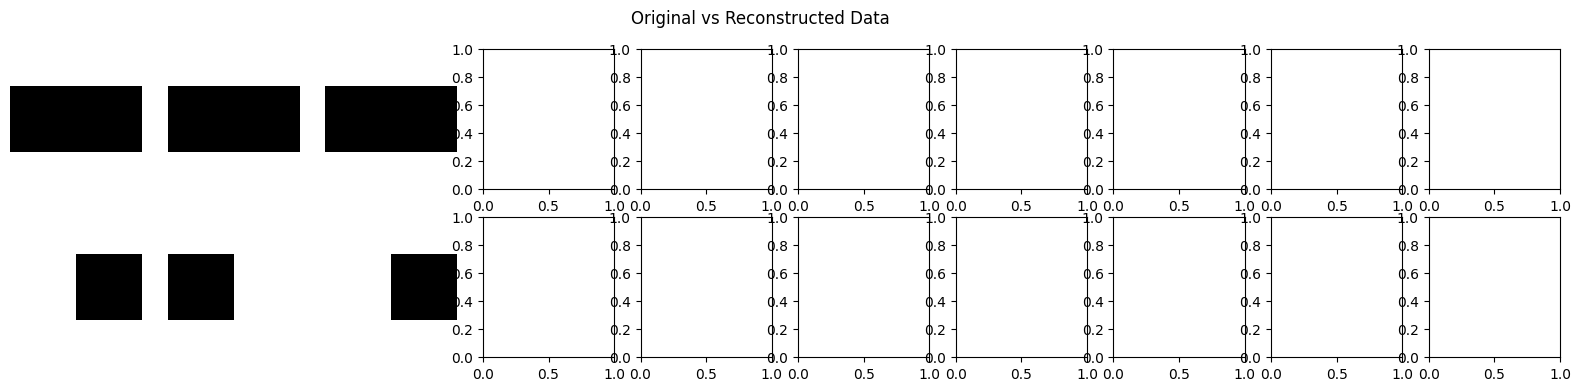

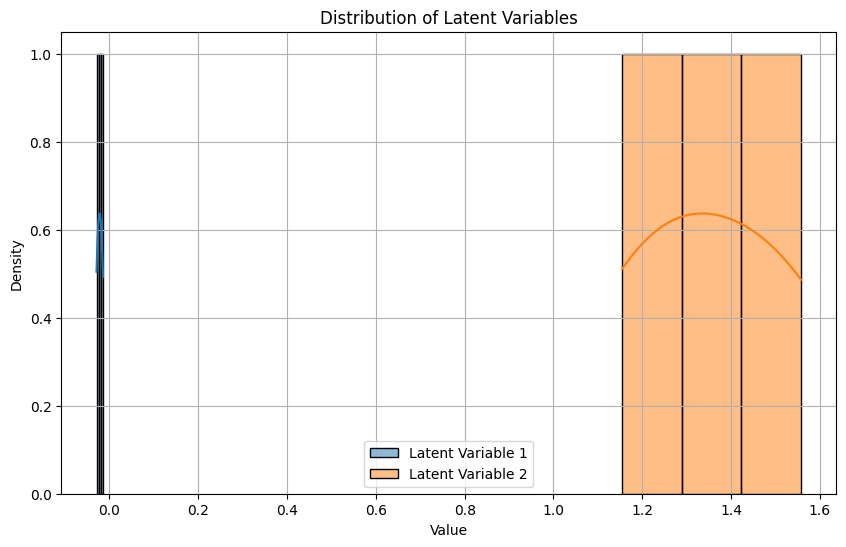

In [ ]:
import numpy as np
model.eval()

# 1. Latent Space Visualization
latent_means = []
latent_logvars = []
with torch.no_grad():
    for data, _ in test_loader:
        data = data.to(device)
        mean, logvar = model.encode(data)
        latent_means.append(mean.cpu().numpy())
        latent_logvars.append(logvar.cpu().numpy())

latent_means = np.concatenate(latent_means, axis=0)
latent_logvars = np.concatenate(latent_logvars, axis=0)

plt.figure(figsize=(10, 6))
plt.scatter(latent_means[:, 0], latent_means[:, 1], alpha=0.5, label='Latent Space')
plt.xlabel('Latent Variable 1')
plt.ylabel('Latent Variable 2')
plt.title('Latent Space Visualization')
plt.legend()
plt.grid(True)
plt.show()

# 2. Reconstruction Comparison
def visualize_reconstruction(model, data_loader, num_images=10):
    model.eval()
    with torch.no_grad():
        for data, _ in data_loader:
            data = data.to(device).clamp(0, 1)
            recon_data, _, _ = model(data)
            data = data.cpu().numpy()
            recon_data = recon_data.cpu().numpy()

            fig, axes = plt.subplots(2, num_images, figsize=(num_images * 2, 4))
            for j in range(num_images):
                if j < data.shape[0]:
                    axes[0, j].imshow(data[j].reshape(1, -1), cmap='gray')
                    axes[0, j].axis('off')
                    axes[1, j].imshow(recon_data[j].reshape(1, -1), cmap='gray')
                    axes[1, j].axis('off')
            plt.suptitle('Original vs Reconstructed Data')
            plt.show()
            break  # Only show one batch

visualize_reconstruction(model, test_loader)

# 3. Distribution of Latent Variables
plt.figure(figsize=(10, 6))
for i in range(latent_dim):
    sns.histplot(latent_means[:, i], kde=True, label=f'Latent Variable {i+1}')
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Distribution of Latent Variables')
plt.legend()
plt.grid(True)
plt.show()


**Step 6: Integration into Simulations for Treatment Planning**

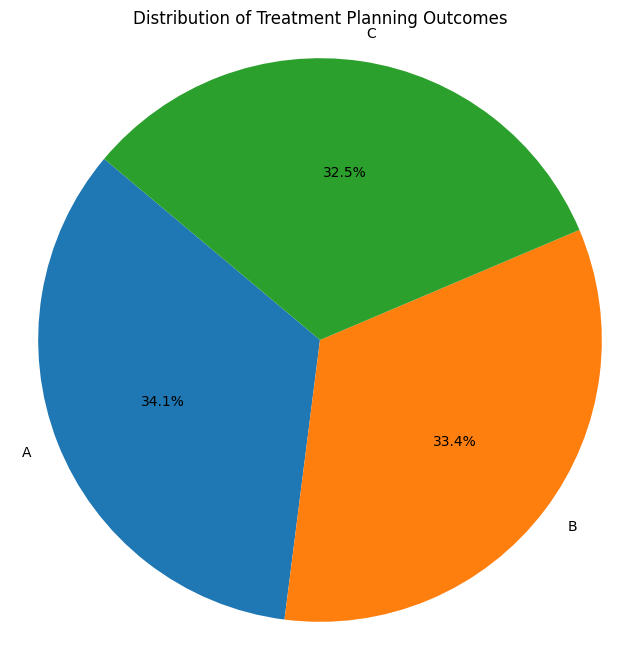

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Function to simulate treatment planning based on generated synthetic data
def treatment_planning(generated_data):
    # Placeholder logic: Generate random treatment outcomes (example)
    treatment_outcomes = np.random.choice(['A', 'B', 'C'], size=len(generated_data))

    return treatment_outcomes

# Simulate treatment planning
treatment_outcomes = treatment_planning(generated_data)

# Count the frequency of each treatment option
unique_treatments, counts = np.unique(treatment_outcomes, return_counts=True)

# Plotting a pie chart for treatment outcomes
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=unique_treatments, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Treatment Planning Outcomes')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


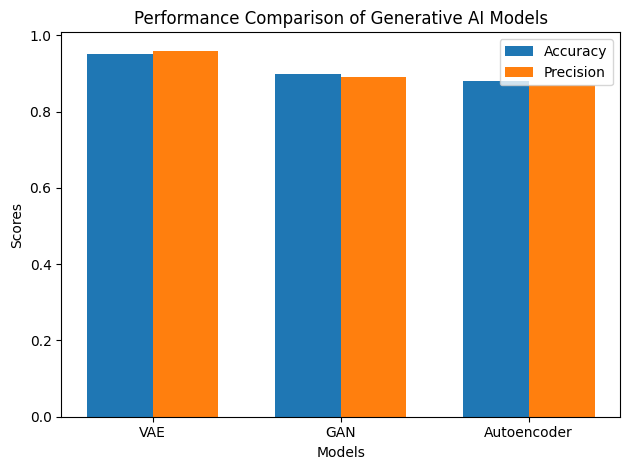

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Sample performance data (replace with actual values)
models = ['VAE', 'GAN', 'Autoencoder']
accuracy_scores = [0.95, 0.90, 0.88]
precision_scores = [0.96, 0.89, 0.87]

x = np.arange(len(models))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, accuracy_scores, width, label='Accuracy')
rects2 = ax.bar(x + width/2, precision_scores, width, label='Precision')

ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Performance Comparison of Generative AI Models')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

fig.tight_layout()
plt.show()
